# **Step 1: Set Up the Environment**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [2]:
# Load the datasets
file_paths = {
    "all_data_1": "all_data_1.csv",
    "all_data_2": "all_data_2.csv",
    "all_data_3": "all_data_3.csv",
    "all_data_4": "all_data_4.csv",
    "all_data_5": "all_data_5.csv",
    "all_data_6": "all_data_6.csv",
    "all_data_7": "all_data_7.csv",
    "all_data_8": "all_data_8.csv",
    "all_data_9": "all_data_9.csv",
    "all_data_10": "all_data_10.csv",
    "all_data_11": "all_data_11.csv",
    "all_data_12": "all_data_12.csv",
    "all_data_13": "all_data_13.csv",
    "all_data_14": "all_data_14.csv",
    "all_data_15": "all_data_15.csv",
    "all_data_16": "all_data_16.csv",
    "all_data_17": "all_data_17.csv",
    "all_data_18": "all_data_18.csv",
    "all_data_19": "all_data_19.csv",
    "all_data_20": "all_data_20.csv",
    "all_data_21": "all_data_21.csv",
    "all_data_22": "all_data_22.csv",
    "all_data_23": "all_data_23.csv",
    "all_data_24": "all_data_24.csv",
    "all_data_25": "all_data_25.csv",
    "all_data_26": "all_data_26.csv",
    "all_data_27": "all_data_27.csv",
    "all_data_28": "all_data_28.csv",
    "all_data_29": "all_data_29.csv",
    "all_data_30": "all_data_30.csv",
    "all_data_31": "all_data_31.csv",
    "all_data_32": "all_data_32.csv",
    "all_data_33": "all_data_33.csv",
    "all_data_34": "all_data_34.csv",
    "all_data_35": "all_data_35.csv",
    "all_data_36": "all_data_36.csv",
    "all_data_37": "all_data_37.csv",
    "all_data_38": "all_data_38.csv",
    "all_data_39": "all_data_39.csv",
    "all_data_40": "all_data_40.csv",
    "all_data_41": "all_data_41.csv",
    "all_data_42": "all_data_42.csv",
    "all_data_43": "all_data_43.csv",
    "all_data_44": "all_data_44.csv",
    "all_data_45": "all_data_45.csv",
    "all_data_46": "all_data_46.csv",
    "all_data_47": "all_data_47.csv",
    "all_data_48": "all_data_48.csv",
    "all_data_49": "all_data_49.csv",
    "all_data_50": "all_data_50.csv",
}

In [3]:
# Load the datasets into pandas DataFrames
datasets = {name: pd.read_csv(path) for name, path in file_paths.items()}

# **Step 2: Preprocessing**

❗❗❗ **Do not forget to change the sensor_columns (depends on the dataset)!** ❗❗❗

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [5]:
# Combine datasets
combined_data = pd.concat([datasets[f"all_data_{i}"] for i in range(1, 51)], ignore_index=True)

# Filter out noise
filtered_data = combined_data[combined_data["Letter"] != "noise"]

# Define sensor columns
sensor_columns = ['Acc_X', 'Acc_Y', 'Acc_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z', 'Mag_X', 'Mag_Y', 'Mag_Z', 'Force']

# Normalize sensor data (Z-score normalization)
scaler = StandardScaler()
filtered_data[sensor_columns] = scaler.fit_transform(filtered_data[sensor_columns])

<ipython-input-5-87109f372068>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[sensor_columns] = scaler.fit_transform(filtered_data[sensor_columns])


In [6]:
# Function to group data into sequences by label
def create_sequences(data):
    sequences = []
    labels = []
    current_label = None
    current_sequence = []

    for _, row in data.iterrows():
        if row["Letter"] != current_label:
            # Save the current sequence if it's not empty
            if current_sequence:
                sequences.append(np.array(current_sequence))
                labels.append(current_label)
            # Start a new sequence
            current_label = row["Letter"]
            current_sequence = []

        # Append sensor values to the current sequence
        current_sequence.append(row[sensor_columns].values)

    # Save the final sequence
    if current_sequence:
        sequences.append(np.array(current_sequence))
        labels.append(current_label)

    return np.array(sequences, dtype=object), labels

In [7]:
# prompt: shape of sequences and labels

# Create sequences and labels
sequences, labels = create_sequences(filtered_data)

# Print the shapes
print("Sequences shape:", sequences.shape)
print("Labels shape:", len(labels))

for seq, label in zip(sequences, labels):
    print(f"Sequence Shape: {seq.shape}, Label: {label}")


Sequences shape: (3094,)
Labels shape: 3094
Sequence Shape: (20, 10), Label: A
Sequence Shape: (20, 10), Label: B
Sequence Shape: (16, 10), Label: C
Sequence Shape: (16, 10), Label: D
Sequence Shape: (15, 10), Label: E
Sequence Shape: (15, 10), Label: F
Sequence Shape: (14, 10), Label: G
Sequence Shape: (11, 10), Label: H
Sequence Shape: (10, 10), Label: I
Sequence Shape: (10, 10), Label: J
Sequence Shape: (10, 10), Label: K
Sequence Shape: (8, 10), Label: L
Sequence Shape: (11, 10), Label: M
Sequence Shape: (10, 10), Label: N
Sequence Shape: (11, 10), Label: O
Sequence Shape: (13, 10), Label: P
Sequence Shape: (12, 10), Label: Q
Sequence Shape: (11, 10), Label: R
Sequence Shape: (12, 10), Label: S
Sequence Shape: (12, 10), Label: T
Sequence Shape: (16, 10), Label: U
Sequence Shape: (18, 10), Label: V
Sequence Shape: (19, 10), Label: W
Sequence Shape: (14, 10), Label: X
Sequence Shape: (15, 10), Label: Y
Sequence Shape: (17, 10), Label: Z
Sequence Shape: (8, 10), Label: a
Sequence Shap

In [8]:
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Create sequences and labels
sequences, labels = create_sequences(filtered_data)

# Map labels to integer indices
unique_labels = list(set(labels))
max_label_length = max([len(label) for label in unique_labels])
characters = set(char for label in unique_labels for char in label)

print("max_label_length: ", max_label_length)

# Define a blank token (typically represented as an empty string or a special character)
blank_token = '-'

# Update the StringLookup layers with the extended vocabulary
char_to_num = layers.StringLookup(
    vocabulary=list(characters), mask_token=None, oov_token=blank_token
)

num_to_char = layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)

# Map labels to integer indices, including the blank token where needed
labels = [char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8")) for label in labels]

# Verify the vocabulary including the blank index
print(f"Vocabulary: {char_to_num.get_vocabulary()}")
print(f"Blank token index: {char_to_num(blank_token).numpy()}")

# Pad the labels with a safe padding value, e.g., -1
padded_labels = pad_sequences(labels, maxlen=max_label_length, padding='post', value=-1)

# Convert to a TensorFlow tensor and replace -1 with the CTC blank index (0)
padded_labels = tf.where(padded_labels == -1, tf.cast(0, tf.int32), tf.convert_to_tensor(padded_labels, dtype=tf.int32))

print(f"Padded Labels Shape: {padded_labels.shape}")  # Expected: (batch_size, max_label_length)

max_label_length:  1
Vocabulary: ['-', '8', 'f', 'P', 'R', 'K', 'h', 'i', 'j', 'Z', 't', 'V', 'I', 'v', 'n', 'C', 'a', 'd', 'w', 'M', 'r', 'S', 'b', 'l', '0', 'x', 'z', 'J', '9', 's', 'm', 'W', 'k', 'X', 'e', 'B', 'H', 'q', 'D', 'c', 'g', 'A', '1', 'p', '3', 'U', 'O', '2', 'F', 'y', 'Y', 'o', '4', '5', 'T', 'u', '6', 'L', 'E', '7', 'N', 'Q', 'G']
Blank token index: 0
Padded Labels Shape: (3094, 1)


In [9]:
# Define padding parameters
max_length = max([len(seq) for seq in sequences])  # Longest sequence
min_length = 0  # Minimum acceptable length for sequences

# Filter out very short sequences
filtered_sequences = [seq for seq in sequences if seq.shape[0] >= min_length]
filtered_labels = [label for seq, label in zip(sequences, padded_labels) if seq.shape[0] >= min_length]

# Pad sequences to the same length
padded_sequences = pad_sequences(filtered_sequences, maxlen=max_length, padding='post', dtype='float32', value=0)

# Verify the new shapes
print(f"Padded Sequences Shape: {padded_sequences.shape}")
print(f"Filtered Labels Count: {len(filtered_labels)}")

print("Max length: ", max_length)


Padded Sequences Shape: (3094, 48, 10)
Filtered Labels Count: 3094
Max length:  48


In [10]:
import tensorflow as tf
import random

def split_data(sequences, labels, train_size=0.7, shuffle=True):
    # Get dataset size
    size = tf.shape(sequences)[0].numpy()  # Get number of sequences

    # Create indices using TensorFlow's range
    indices = list(range(size))  # Using Python list to avoid TensorFlow slicing issues

    if shuffle:
        random.shuffle(indices)  # Shuffle indices in-place using Python

    # Calculate training set size
    train_samples = int(size * train_size)

    # Convert indices to TensorFlow tensors for tensor slicing
    train_idx = tf.convert_to_tensor(indices[:train_samples])
    valid_idx = tf.convert_to_tensor(indices[train_samples:])

    # Slice sequences properly using TensorFlow
    x_train = tf.gather(sequences, train_idx)
    x_valid = tf.gather(sequences, valid_idx)

    # Slice labels (which are lists of tensors) using Python indexing
    y_train = [labels[i] for i in indices[:train_samples]]
    y_valid = [labels[i] for i in indices[train_samples:]]

    return x_train, x_valid, y_train, y_valid

# Ensure padded_sequences is a TensorFlow tensor
padded_sequences_tensor = tf.convert_to_tensor(padded_sequences)

# Apply the fixed split_data function
X_train, X_test, y_train, y_test = split_data(padded_sequences_tensor, filtered_labels)

# Check types to confirm they remain unchanged
print(type(X_train), type(y_train))  # Expected: (tensorflow.Tensor, list)
print(type(X_test), type(y_test))    # Expected: (tensorflow.Tensor, list)


<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'list'>
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'list'>


In [11]:
''' for seq, label in zip(padded_sequences, filtered_labels):
    print(f"Sequence Shape: {seq.shape}, Label: {label}") '''

' for seq, label in zip(padded_sequences, filtered_labels):\n    print(f"Sequence Shape: {seq.shape}, Label: {label}") '

In [12]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {len(y_train)}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {len(y_test)}")

X_train shape: (2165, 48, 10)
y_train shape: 2165
X_test shape: (929, 48, 10)
y_test shape: 929


# **Define CTC Loss**

In [13]:
def ctc_loss(y_true, y_pred):
    # Transpose y_pred if using logits_time_major=True (to [max_time, batch_size, num_classes])
    y_pred = tf.transpose(y_pred, [1, 0, 2])

    # Ensure y_true is of type int32 (or another allowed type)
    y_true = tf.cast(y_true, tf.int32)  # Cast to int32

    # Calculate input length (logit length) and label length
    logit_length = tf.fill([tf.shape(y_pred)[1]], tf.shape(y_pred)[0])  # shape: (batch_size,)
    label_length = tf.reduce_sum(tf.cast(tf.not_equal(y_true, 0), tf.int32), axis=1)  # shape: (batch_size,)

    # Compute the CTC loss using tf.nn.ctc_loss
    loss = tf.nn.ctc_loss(
        labels=y_true,
        logits=y_pred,
        label_length=label_length,
        logit_length=logit_length,
        logits_time_major=True,
        blank_index=0
    )

    ''' # Debugging shapes
    print("y_true shape:", y_true.shape)
    print("y_pred shape:", y_pred.shape)
    print("logit_length shape:", logit_length.shape)
    print("label_length shape:", label_length.shape) '''

    return loss

# **Common Model Processing**

In [14]:
from keras.callbacks import EarlyStopping

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

from tensorflow.keras.callbacks import LearningRateScheduler

# Define a learning rate scheduler function
def scheduler(epoch, lr):
  if epoch < 10:
    return float(lr)
  else:
    return float(lr * tf.math.exp(-0.1))

# Create the learning rate scheduler callback
lr_scheduler = LearningRateScheduler(scheduler)

In [15]:
batch_size = 32

# Prepare the data with the correctly padded labels
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
valid_data = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Check shapes before training
for x_batch, y_batch in train_data.take(1):
    print("Batch X shape:", x_batch.shape)  # Expected: (batch_size, time_steps, features)
    print("Batch Y shape:", y_batch.shape)  # Expected: (batch_size, max_label_length)

Batch X shape: (32, 48, 10)
Batch Y shape: (32, 1)


In [16]:
# Input shape and number of classes
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, features)
num_classes = len(char_to_num.get_vocabulary()) + 1  # Include the blank token (0 index)

print("Input shape:", input_shape)
print("Number of classes:", num_classes)

Input shape: (48, 10)
Number of classes: 64


# **Step 3: Models**







**CNN**

In [17]:
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.optimizers import Adam

def build_ctc_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Input(shape=input_shape),

        layers.Conv1D(1024, kernel_size=5, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(0.3),

        layers.Conv1D(512, kernel_size=3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(0.3),

        layers.Conv1D(256, kernel_size=3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(0.3),

        layers.Conv1D(128, kernel_size=3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(0.3),

        # Dense layer without softmax, to provide logits
        layers.Dense(num_classes)
    ])
    return model

# Build the CNN model
ctc_cnn_model = build_ctc_cnn_model(input_shape, num_classes)

# Compile the model with CTC loss
ctc_cnn_model.compile(optimizer='adam', loss=ctc_loss)

# Display the model summary to verify the architecture
ctc_cnn_model.summary()

# Train the model
cnn_history = ctc_cnn_model.fit(
    train_data,
    validation_data=valid_data,
    epochs=500,
    callbacks=[early_stopping, lr_scheduler]
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 48, 1024)            │          52,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 1024)            │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 24, 1024)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 1024)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 24, 512)             │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 512)             │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 12, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 12, 256)             │         393,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 6, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 6, 128)              │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 3, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 3, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3, 64)               │           8,256 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,133,440 (8.14 MB)

 Trainable params: 2,129,600 (8.12 MB)

 Non-trainable params: 3,840 (15.00 KB)

Epoch 1/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - loss: 6.9941 - val_loss: 5.3688 - learning_rate: 0.0010
Epoch 2/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3807 - val_loss: 6.1827 - learning_rate: 0.0010
Epoch 3/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3043 - val_loss: 5.7263 - learning_rate: 0.0010
Epoch 4/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.2657 - val_loss: 5.7405 - learning_rate: 0.0010
Epoch 5/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.2861 - val_loss: 5.1018 - learning_rate: 0.0010
Epoch 6/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.2454 - val_loss: 4.3472 - learning_rate: 0.0010
Epoch 7/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.2031 - val_loss: 4.2626 - learning_rate: 0.0010
Epoch 8/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.1902 - val_loss: 4.2092 - learning_rate: 0.0010
Epoch 9/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.1847 - val_loss: 4.2044 - learning_rate: 0.0010
Epoch 10/500
68/

**CLDNN**

In [18]:
from tensorflow.keras import layers, models
import tensorflow as tf

# Define the CLDNN Model without softmax
def create_cldnn_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape, name='input')

    # Convolutional Layers
    x = layers.Conv1D(512, 5, activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv1D(256, 3, activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv1D(128, 3, activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Dropout(0.3)(x)

    # LSTM Layers
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, activation='tanh'))(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, activation='tanh'))(x)
    x = layers.Dropout(0.3)(x)

    # Fully Connected Layer
    x = layers.Dense(100, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    # Linear Output Layer (No activation function)
    outputs = layers.Dense(num_classes)(x)

    # Define the model
    model = models.Model(inputs, outputs, name='CLDNN_Model')
    return model

# Create the CLDNN model
cldnn_model = create_cldnn_model(input_shape, num_classes)

# Compile the model with CTC loss
cldnn_model.compile(optimizer='adam', loss=ctc_loss)

# Display model summary
cldnn_model.summary()

# Train the model
cldnn_history = cldnn_model.fit(
    train_data,
    validation_data=valid_data,
    epochs=500,
    callbacks=[early_stopping, lr_scheduler]
)

Model: "CLDNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 48, 10)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 48, 512)             │          26,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 48, 512)             │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 24, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 24, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 24, 256)             │         393,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 24, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 12, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 12, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 12, 128)             │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 12, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 6, 128)              │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 6, 128)              │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6, 100)              │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 6, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6, 64)               │           6,4

 Total params: 738,596 (2.82 MB)

 Trainable params: 736,804 (2.81 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - loss: 10.5235 - val_loss: 4.8146 - learning_rate: 0.0010
Epoch 2/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 4.4543 - val_loss: 6.5636 - learning_rate: 0.0010
Epoch 3/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 4.2014 - val_loss: 19.8510 - learning_rate: 0.0010
Epoch 4/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 4.1628 - val_loss: 19.6823 - learning_rate: 0.0010
Epoch 5/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 4.1462 - val_loss: 12.4579 - learning_rate: 0.0010
Epoch 6/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 4.1387 - val_loss: 4.5780 - learning_rate: 0.0010
Epoch 7/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 4.1024 - val_loss: 4.0769 - learning_rate: 0.0010
Epoch 8/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 4.0416 - val_loss: 3.9947 - learning_rate: 0.0010
Epoch 9/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 3.9513 - val_loss: 3.8449 - learning_rate: 0.0010
Epoch

**BiLSTM**

In [19]:
from tensorflow.keras import layers, models
import tensorflow as tf

# Define the BiLSTM model
def create_bilstm_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape, name='input')

    # Bidirectional LSTM Layers
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, activation='tanh'))(inputs)
    x = layers.Dropout(0.3)(x)

    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, activation='tanh'))(x)
    x = layers.Dropout(0.3)(x)

    # Fully Connected Layer
    x = layers.Dense(100, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    # Linear Output Layer (No activation function)
    outputs = layers.Dense(num_classes)(x)

    # Define the model
    model = models.Model(inputs, outputs, name='BiLSTM_Model')
    return model

# Create the BiLSTM model
bilstm_model = create_bilstm_model(input_shape, num_classes)

# Compile the model with CTC loss
bilstm_model.compile(optimizer='adam', loss=ctc_loss)

# Display model summary
bilstm_model.summary()

# Train the model
bilstm_history = bilstm_model.fit(
    train_data,
    validation_data=valid_data,
    epochs=500,
    callbacks=[early_stopping, lr_scheduler]
)

Model: "BiLSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 48, 10)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 48, 256)             │         142,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 48, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 48, 256)             │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 48, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 48, 100)             │          25,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 48, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 48, 64)              │           6,464 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 568,740 (2.17 MB)

 Trainable params: 568,740 (2.17 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - loss: 78.1464 - val_loss: 4.8625 - learning_rate: 0.0010
Epoch 2/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 4.9156 - val_loss: 4.4390 - learning_rate: 0.0010
Epoch 3/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 4.5073 - val_loss: 4.2236 - learning_rate: 0.0010
Epoch 4/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 4.2988 - val_loss: 4.1732 - learning_rate: 0.0010
Epoch 5/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 4.2236 - val_loss: 4.1592 - learning_rate: 0.0010
Epoch 6/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 4.1887 - val_loss: 4.1546 - learning_rate: 0.0010
Epoch 7/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 4.1755 - val_loss: 4.1517 - learning_rate: 0.0010
Epoch 8/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - loss: 4.1777 - val_loss: 4.1480 - learning_rate: 0.0010
Epoch 9/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 4.1588 - val_loss: 4.1491 - learning_rate: 0.0010

**TCN**

In [20]:
from tensorflow.keras import layers, models
import tensorflow as tf

# Define the TCN Model
def create_tcn_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape, name='input')

    # TCN Layers (Using Conv1D with causal padding and dilation rate)
    x = layers.Conv1D(128, kernel_size=3, padding='causal', activation='relu', dilation_rate=1)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv1D(128, kernel_size=3, padding='causal', activation='relu', dilation_rate=2)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv1D(128, kernel_size=3, padding='causal', activation='relu', dilation_rate=4)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    # Fully Connected Layer
    x = layers.Dense(100, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    # Linear Output Layer (No activation function)
    outputs = layers.Dense(num_classes)(x)

    # Define the model
    model = models.Model(inputs, outputs, name='TCN_Model')
    return model

# Create the TCN model
tcn_model = create_tcn_model(input_shape, num_classes)

# Compile the model with CTC loss
tcn_model.compile(optimizer='adam', loss=ctc_loss)

# Display model summary
tcn_model.summary()

# Train the model
tcn_history = tcn_model.fit(
    train_data,
    validation_data=valid_data,
    epochs=500,
    callbacks=[early_stopping, lr_scheduler]
)

Model: "TCN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 48, 10)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 48, 128)             │           3,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 48, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 48, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 48, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 48, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 48, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 48, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 48, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 48, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 48, 100)             │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 48, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 48, 64)              │           6,464 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123,428 (482.14 KB)

 Trainable params: 122,660 (479.14 KB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 20s 150ms/step - loss: 101.1147 - val_loss: 10.6251 - learning_rate: 0.0010
Epoch 2/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.4556 - val_loss: 6.4194 - learning_rate: 0.0010
Epoch 3/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.2491 - val_loss: 5.2218 - learning_rate: 0.0010
Epoch 4/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.1621 - val_loss: 5.0765 - learning_rate: 0.0010
Epoch 5/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.1615 - val_loss: 5.0399 - learning_rate: 0.0010
Epoch 6/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.0936 - val_loss: 5.0013 - learning_rate: 0.0010
Epoch 7/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.0541 - val_loss: 4.9442 - learning_rate: 0.0010
Epoch 8/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.0153 - val_loss: 4.8266 - learning_rate: 0.0010
Epoch 9/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.9401 - val_loss: 4.6930 - learning_rate: 0.0010
Epoch 10/500


**Transformer**

In [21]:
from tensorflow.keras import layers, models
import tensorflow as tf

# Define the Transformer Model
def create_transformer_model(input_shape, num_classes, num_heads=4, ff_dim=128, num_layers=4):
    inputs = layers.Input(shape=input_shape, name='input')

    # Positional Encoding (optional for sequence data)
    x = layers.Conv1D(128, kernel_size=3, padding='same', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    for _ in range(num_layers):
        # Multi-Head Attention
        attn_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=ff_dim)(x, x)
        attn_output = layers.Dropout(0.3)(attn_output)
        attn_output = layers.LayerNormalization(epsilon=1e-6)(attn_output + x)

        # Feed Forward Network
        ffn = layers.Dense(ff_dim, activation='relu')(attn_output)
        ffn = layers.Dense(128)(ffn)
        ffn = layers.Dropout(0.3)(ffn)

        # Add & Norm
        x = layers.LayerNormalization(epsilon=1e-6)(ffn + attn_output)

    # Fully Connected Layer
    x = layers.Dense(100, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    # Linear Output Layer (No activation function)
    outputs = layers.Dense(num_classes)(x)

    # Define the model
    model = models.Model(inputs, outputs, name='Transformer_Model')
    return model

# Create the Transformer model
transformer_model = create_transformer_model(input_shape, num_classes)

# Compile the model with CTC loss
transformer_model.compile(optimizer='adam', loss=ctc_loss)

# Display model summary
transformer_model.summary()

# Train the model
transformer_history = transformer_model.fit(
    train_data,
    validation_data=valid_data,
    epochs=500,
    callbacks=[early_stopping, lr_scheduler]
)

Model: "Transformer_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)        │ (None, 48, 10)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_10 (Conv1D)        │ (None, 48, 128)        │          3,968 │ input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_10    │ (None, 48, 128)        │            512 │ conv1d_10[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_17 (Dropout)      │ (None, 48, 128)        │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 48, 128)        │        263,808 │ dropout_17[0][0],      │
│ (MultiHeadAttention)      │                        │                │ dropout_17[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_19 (Dropout)      │ (None, 48, 128)        │              0 │ multi_head_attention[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 48, 128)        │              0 │ dropout_19[0][0],      │
│                           │                        │                │ dropout_17[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 48, 128)        │            256 │ add[0][0]              │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 48, 128)        │         16,512 │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 48, 128)        │         16,512 │ dense_7[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_20 (Dropout)      │ (None, 48, 128)        │              0 │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 48, 128)        │              0 │ dropout_20[0][0],      │
│                           │                        │                │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 48, 128)        │            256 │ add_1[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ (None, 48, 128)        │        263,808 │ layer_normalization_1… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_22 (Dropout)      │ (None, 48, 128)        │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 48, 128)        │              0 │ dropout_22[0][0],      │
│                      

 Total params: 1,213,220 (4.63 MB)

 Trainable params: 1,212,964 (4.63 MB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 73s 533ms/step - loss: 25.3337 - val_loss: 6.6038 - learning_rate: 0.0010
Epoch 2/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.2129 - val_loss: 6.6199 - learning_rate: 0.0010
Epoch 3/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.1997 - val_loss: 6.5235 - learning_rate: 0.0010
Epoch 4/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.1825 - val_loss: 6.4137 - learning_rate: 0.0010
Epoch 5/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.1738 - val_loss: 6.2005 - learning_rate: 0.0010
Epoch 6/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.1827 - val_loss: 6.3567 - learning_rate: 0.0010
Epoch 7/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.1781 - val_loss: 6.2432 - learning_rate: 0.0010
Epoch 8/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.1793 - val_loss: 6.1475 - learning_rate: 0.0010
Epoch 9/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.1841 - val_loss: 6.1472 - learning_rate: 0.0010
Epoch 10/500
6

**InceptionTime**

In [22]:
from tensorflow.keras import layers, models
import tensorflow as tf

# Define the InceptionTime Model
def create_inceptiontime_model(input_shape, num_classes, num_blocks=3, num_filters=32):
    inputs = layers.Input(shape=input_shape, name='input')

    x = inputs
    for _ in range(num_blocks):
        # Inception Module
        conv_1x1 = layers.Conv1D(num_filters, kernel_size=1, padding='same', activation='relu')(x)

        conv_3x3 = layers.Conv1D(num_filters, kernel_size=3, padding='same', activation='relu')(x)

        conv_5x5 = layers.Conv1D(num_filters, kernel_size=5, padding='same', activation='relu')(x)

        max_pool = layers.MaxPooling1D(pool_size=3, strides=1, padding='same')(x)
        max_pool = layers.Conv1D(num_filters, kernel_size=1, padding='same', activation='relu')(max_pool)

        # Concatenate all paths
        x = layers.Concatenate()([conv_1x1, conv_3x3, conv_5x5, max_pool])
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.3)(x)

    # Fully Connected Layer
    x = layers.Dense(100, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    # Linear Output Layer (No activation function)
    outputs = layers.Dense(num_classes)(x)

    # Define the model
    model = models.Model(inputs, outputs, name='InceptionTime_Model')
    return model

# Create the InceptionTime model
inceptiontime_model = create_inceptiontime_model(input_shape, num_classes)

# Compile the model with CTC loss
inceptiontime_model.compile(optimizer='adam', loss=ctc_loss)

# Display model summary
inceptiontime_model.summary()

# Train the model
inceptiontime_history = inceptiontime_model.fit(
    train_data,
    validation_data=valid_data,
    epochs=500,
    callbacks=[early_stopping, lr_scheduler]
)

Model: "InceptionTime_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)        │ (None, 48, 10)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_7           │ (None, 48, 10)         │              0 │ input[0][0]            │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_11 (Conv1D)        │ (None, 48, 32)         │            352 │ input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_12 (Conv1D)        │ (None, 48, 32)         │            992 │ input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_13 (Conv1D)        │ (None, 48, 32)         │          1,632 │ input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_14 (Conv1D)        │ (None, 48, 32)         │            352 │ max_pooling1d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 48, 128)        │              0 │ conv1d_11[0][0],       │
│                           │                        │                │ conv1d_12[0][0],       │
│                           │                        │                │ conv1d_13[0][0],       │
│                           │                        │                │ conv1d_14[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_11    │ (None, 48, 128)        │            512 │ concatenate[0][0]      │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_31 (Dropout)      │ (None, 48, 128)        │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_8           │ (None, 48, 128)        │              0 │ dropout_31[0][0]       │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_15 (Conv1D)        │ (None, 48, 32)         │          4,128 │ dropout_31[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_16 (Conv1D)        │ (None, 48, 32)         │         12,320 │ dropout_31[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_17 (Conv1D)        │ (None, 48, 32)         │         20,512 │ dropout_31[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_18 (Conv1D)        │ (None, 48, 32)         │          4,128 │ max_pooling1d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 48, 128)        │              0 │ conv1d_15[0][0],       │
│ (Concatenate)             │                        │                │ conv1d_16[0][0],       │
│                           │                        │                │ conv1d_17[0][0],       │
│                           │                        │                │ conv1d_18[0][0]        │
├──────────────────────

 Total params: 106,404 (415.64 KB)

 Trainable params: 105,636 (412.64 KB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 20s 135ms/step - loss: 101.3929 - val_loss: 7.3699 - learning_rate: 0.0010
Epoch 2/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0926 - val_loss: 7.8376 - learning_rate: 0.0010
Epoch 3/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8076 - val_loss: 6.0358 - learning_rate: 0.0010
Epoch 4/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6029 - val_loss: 4.8059 - learning_rate: 0.0010
Epoch 5/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4711 - val_loss: 4.4164 - learning_rate: 0.0010
Epoch 6/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3895 - val_loss: 4.2829 - learning_rate: 0.0010
Epoch 7/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3378 - val_loss: 4.2311 - learning_rate: 0.0010
Epoch 8/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2877 - val_loss: 4.2182 - learning_rate: 0.0010
Epoch 9/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.2632 - val_loss: 4.1991 - learning_rate: 0.0010
Epoch 10/500
6

**HMM-RNN**

In [23]:
from tensorflow.keras import layers, models
import tensorflow as tf
from tensorflow_probability import distributions as tfd

# Define the HMM-RNN Hybrid Model
def create_hmm_rnn_model(input_shape, num_classes, num_hidden_states=50):
    inputs = layers.Input(shape=input_shape, name='input')

    # Recurrent Layers
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, activation='tanh'))(inputs)
    x = layers.Dropout(0.3)(x)

    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, activation='tanh'))(x)
    x = layers.Dropout(0.3)(x)

    # Hidden Markov Model (HMM) Layer
    # Assuming a Gaussian HMM with a mixture of outputs
    x = layers.Dense(num_hidden_states, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    # Fully Connected Layer
    x = layers.Dense(100, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    # Linear Output Layer (No activation function)
    outputs = layers.Dense(num_classes)(x)

    # Define the model
    model = models.Model(inputs, outputs, name='HMM_RNN_Model')
    return model

# Create the HMM-RNN hybrid model
hmm_rnn_model = create_hmm_rnn_model(input_shape, num_classes)

# Compile the model with CTC loss
hmm_rnn_model.compile(optimizer='adam', loss=ctc_loss)

# Display model summary
hmm_rnn_model.summary()

# Train the model
hmm_rnn_history = hmm_rnn_model.fit(
    train_data,
    validation_data=valid_data,
    epochs=500,
    callbacks=[early_stopping, lr_scheduler]
)

Model: "HMM_RNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 48, 10)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 48, 256)             │         142,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 48, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 48, 256)             │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 48, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 48, 50)              │          12,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 48, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 48, 100)             │           5,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 48, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 48, 64)              │           6,464 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 560,990 (2.14 MB)

 Trainable params: 560,990 (2.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - loss: 79.9768 - val_loss: 6.5151 - learning_rate: 0.0010
Epoch 2/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - loss: 5.3118 - val_loss: 5.9211 - learning_rate: 0.0010
Epoch 3/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 5.1898 - val_loss: 5.3032 - learning_rate: 0.0010
Epoch 4/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - loss: 5.1328 - val_loss: 4.7740 - learning_rate: 0.0010
Epoch 5/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - loss: 4.8180 - val_loss: 4.2882 - learning_rate: 0.0010
Epoch 6/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 4.3841 - val_loss: 4.1797 - learning_rate: 0.0010
Epoch 7/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - loss: 4.2472 - val_loss: 4.1614 - learning_rate: 0.0010
Epoch 8/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - loss: 4.1963 - val_loss: 4.1579 - learning_rate: 0.0010
Epoch 9/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 4.1842 - val_loss: 4.1567 - learning_rate: 0.0010

**BLSTM-CTC**

In [24]:
from tensorflow.keras import layers, models
import tensorflow as tf

# Define the BLSTM-CTC Model
def create_blstm_ctc_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape, name='input')

    # Bidirectional LSTM Layers
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, activation='tanh'))(inputs)
    x = layers.Dropout(0.3)(x)

    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, activation='tanh'))(x)
    x = layers.Dropout(0.3)(x)

    # Fully Connected Layer
    x = layers.Dense(100, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    # Linear Output Layer (No activation function)
    outputs = layers.Dense(num_classes)(x)

    # Define the model
    model = models.Model(inputs, outputs, name='BLSTM_CTC_Model')
    return model

# Create the BLSTM-CTC model
blstm_ctc_model = create_blstm_ctc_model(input_shape, num_classes)

# Compile the model with CTC loss
blstm_ctc_model.compile(optimizer='adam', loss=ctc_loss)

# Display model summary
blstm_ctc_model.summary()

# Train the model
blstm_ctc_history = blstm_ctc_model.fit(
    train_data,
    validation_data=valid_data,
    epochs=500,
    callbacks=[early_stopping, lr_scheduler]
)

Model: "BLSTM_CTC_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 48, 10)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_6 (Bidirectional)      │ (None, 48, 256)             │         142,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 48, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ (None, 48, 256)             │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 48, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 48, 100)             │          25,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 48, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 48, 64)              │           6,464 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 568,740 (2.17 MB)

 Trainable params: 568,740 (2.17 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - loss: 79.0912 - val_loss: 5.1403 - learning_rate: 0.0010
Epoch 2/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 5.1182 - val_loss: 4.6307 - learning_rate: 0.0010
Epoch 3/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 4.6482 - val_loss: 4.2521 - learning_rate: 0.0010
Epoch 4/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 4.3050 - val_loss: 4.1813 - learning_rate: 0.0010
Epoch 5/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 4.2238 - val_loss: 4.1621 - learning_rate: 0.0010
Epoch 6/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 4.1885 - val_loss: 4.1598 - learning_rate: 0.0010
Epoch 7/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 4.1839 - val_loss: 4.1559 - learning_rate: 0.0010
Epoch 8/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - loss: 4.1620 - val_loss: 4.1529 - learning_rate: 0.0010
Epoch 9/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 4.1605 - val_loss: 4.1544 - learning_rate: 0.0010

**CNN-BiLSTM-Attention**

In [25]:
from tensorflow.keras import layers, models
import tensorflow as tf

# Define the Hybrid CNN-BiLSTM-Attention Model
def create_hybrid_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape, name='input')

    # Convolutional Layers for Feature Extraction
    x = layers.Conv1D(128, 3, activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv1D(256, 3, activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Dropout(0.3)(x)

    # Bidirectional LSTM Layers for Temporal Dependencies
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, activation='tanh'))(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, activation='tanh'))(x)
    x = layers.Dropout(0.3)(x)

    # Self-Attention Layer
    attention_data = layers.MultiHeadAttention(num_heads=4, key_dim=128)(x, x)
    x = layers.LayerNormalization()(attention_data + x)  # Residual connection

    # Fully Connected Layer
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    # Linear Output Layer (No activation function)
    outputs = layers.Dense(num_classes)(x)

    # Define the model
    model = models.Model(inputs, outputs, name='Hybrid_CNN_BiLSTM_Attention_Model')
    return model

# Create the hybrid model
hybrid_model = create_hybrid_model(input_shape, num_classes)

# Compile the model with CTC loss
hybrid_model.compile(optimizer='adam', loss=ctc_loss)

# Display model summary
hybrid_model.summary()

# Fit the model
hybrid_history = hybrid_model.fit(
    train_data,
    validation_data=valid_data,
    epochs=500,
    callbacks=[early_stopping, lr_scheduler]
)

Model: "Hybrid_CNN_BiLSTM_Attention_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)        │ (None, 48, 10)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_23 (Conv1D)        │ (None, 48, 128)        │          3,968 │ input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_14    │ (None, 48, 128)        │            512 │ conv1d_23[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_10          │ (None, 24, 128)        │              0 │ batch_normalization_1… │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_42 (Dropout)      │ (None, 24, 128)        │              0 │ max_pooling1d_10[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_24 (Conv1D)        │ (None, 24, 256)        │         98,560 │ dropout_42[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_15    │ (None, 24, 256)        │          1,024 │ conv1d_24[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_11          │ (None, 12, 256)        │              0 │ batch_normalization_1… │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_43 (Dropout)      │ (None, 12, 256)        │              0 │ max_pooling1d_11[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_8           │ (None, 12, 256)        │        394,240 │ dropout_43[0][0]       │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_44 (Dropout)      │ (None, 12, 256)        │              0 │ bidirectional_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_9           │ (None, 12, 256)        │        394,240 │ dropout_44[0][0]       │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_45 (Dropout)      │ (None, 12, 256)        │              0 │ bidirectional_9[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_4    │ (None, 12, 256)        │        526,080 │ dropout_45[0][0],      │
│ (MultiHeadAttention)      │                        │                │ dropout_45[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_8 (Add)               │ (None, 12, 256)        │              0 │ multi_head_attention_… │
│                           │                        │                │ dropout_45[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_8

 Total params: 1,460,288 (5.57 MB)

 Trainable params: 1,459,520 (5.57 MB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 9.9375 - val_loss: 5.2791 - learning_rate: 0.0010
Epoch 2/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 5.1934 - val_loss: 5.7562 - learning_rate: 0.0010
Epoch 3/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 4.9670 - val_loss: 4.7899 - learning_rate: 0.0010
Epoch 4/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 4.2056 - val_loss: 4.1925 - learning_rate: 0.0010
Epoch 5/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 4.1658 - val_loss: 4.1564 - learning_rate: 0.0010
Epoch 6/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 4.1578 - val_loss: 4.1577 - learning_rate: 0.0010
Epoch 7/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 4.1579 - val_loss: 4.1595 - learning_rate: 0.0010
Epoch 8/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 4.1666 - val_loss: 4.1558 - learning_rate: 0.0010
Epoch 9/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 4.1579 - val_loss: 4.1533 - learning_rate: 0.0010
Epoch 10/

**TCN-BiLSTM-Attention Hybrid**

In [26]:
from tensorflow.keras import layers, models
import tensorflow as tf

# Define the TCN-BiLSTM-Attention Hybrid Model
def create_tcn_bilstm_attention_model(input_shape, num_classes, filters=64, kernel_size=3, num_heads=4):
    inputs = layers.Input(shape=input_shape, name='input')

    # Temporal Convolutional Network (TCN) Layers
    x = layers.Conv1D(filters, kernel_size, padding='causal', activation='relu', dilation_rate=1)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv1D(filters * 2, kernel_size, padding='causal', activation='relu', dilation_rate=2)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv1D(filters * 4, kernel_size, padding='causal', activation='relu', dilation_rate=4)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    # Bidirectional LSTM for Temporal Dependencies
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, activation='tanh'))(x)
    x = layers.Dropout(0.3)(x)

    # Self-Attention Layer
    attention_data = layers.MultiHeadAttention(num_heads=num_heads, key_dim=128)(x, x)
    x = layers.LayerNormalization()(attention_data + x)  # Residual connection

    # Fully Connected Layer
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    # Linear Output Layer (No activation function)
    outputs = layers.Dense(num_classes)(x)

    # Define the model
    model = models.Model(inputs, outputs, name='TCN_BiLSTM_Attention_Model')
    return model

# Create the hybrid model
tcn_bilstm_attention_model = create_tcn_bilstm_attention_model(input_shape, num_classes)

# Compile the model with CTC loss
tcn_bilstm_attention_model.compile(optimizer='adam', loss=ctc_loss)

# Display model summary
tcn_bilstm_attention_model.summary()

# Fit the model
tcn_bilstm_attention_history = tcn_bilstm_attention_model.fit(
    train_data,
    validation_data=valid_data,
    epochs=500,
    callbacks=[early_stopping, lr_scheduler]
)

Model: "TCN_BiLSTM_Attention_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)        │ (None, 48, 10)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_25 (Conv1D)        │ (None, 48, 64)         │          1,984 │ input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_16    │ (None, 48, 64)         │            256 │ conv1d_25[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_48 (Dropout)      │ (None, 48, 64)         │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_26 (Conv1D)        │ (None, 48, 128)        │         24,704 │ dropout_48[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_17    │ (None, 48, 128)        │            512 │ conv1d_26[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_49 (Dropout)      │ (None, 48, 128)        │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_27 (Conv1D)        │ (None, 48, 256)        │         98,560 │ dropout_49[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_18    │ (None, 48, 256)        │          1,024 │ conv1d_27[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_50 (Dropout)      │ (None, 48, 256)        │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_10          │ (None, 48, 256)        │        394,240 │ dropout_50[0][0]       │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_51 (Dropout)      │ (None, 48, 256)        │              0 │ bidirectional_10[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_5    │ (None, 48, 256)        │        526,080 │ dropout_51[0][0],      │
│ (MultiHeadAttention)      │                        │                │ dropout_51[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_9 (Add)               │ (None, 48, 256)        │              0 │ multi_head_attention_… │
│                           │                        │                │ dropout_51[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_9     │ (None, 48, 256)        │            512 │ add_9[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_26 (Dense)          │ (None, 48, 128)        │         32,896 │ layer_normalization_9… │
├──────────────────────

 Total params: 1,089,024 (4.15 MB)

 Trainable params: 1,088,128 (4.15 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 15s 129ms/step - loss: 34.7880 - val_loss: 5.9660 - learning_rate: 0.0010
Epoch 2/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - loss: 5.2310 - val_loss: 5.7087 - learning_rate: 0.0010
Epoch 3/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - loss: 5.1737 - val_loss: 5.6925 - learning_rate: 0.0010
Epoch 4/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - loss: 5.1947 - val_loss: 5.6959 - learning_rate: 0.0010
Epoch 5/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - loss: 5.1741 - val_loss: 5.6652 - learning_rate: 0.0010
Epoch 6/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - loss: 5.1656 - val_loss: 5.5041 - learning_rate: 0.0010
Epoch 7/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - loss: 5.1328 - val_loss: 5.7234 - learning_rate: 0.0010
Epoch 8/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - loss: 5.0723 - val_loss: 5.8127 - learning_rate: 0.0010
Epoch 9/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - loss: 4.9961 - val_loss: 5.4824 - learning_rate: 0.0010

**Attention-Based Seq2Seq Model**

In [27]:
from tensorflow.keras import layers, models
import tensorflow as tf

# Define the Attention-Based Seq2Seq Model for Handwriting Recognition
def create_attention_seq2seq_model(input_shape, num_classes, num_heads=4, rnn_units=256):
    inputs = layers.Input(shape=input_shape, name='input')

    # Encoder: CNN + Bidirectional LSTM
    x = layers.Conv1D(128, 3, activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv1D(256, 3, activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Bidirectional(layers.LSTM(256, return_sequences=True, activation='tanh'))(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Bidirectional(layers.LSTM(256, return_sequences=True, activation='tanh'))(x)
    x = layers.Dropout(0.3)(x)

    # Attention Mechanism
    attention_data = layers.MultiHeadAttention(num_heads=num_heads, key_dim=256)(x, x)
    x = layers.LayerNormalization()(attention_data + x)  # Residual connection

    # Decoder: Unidirectional LSTM with Attention
    x = layers.LSTM(256, return_sequences=True, activation='tanh')(x)
    x = layers.Dropout(0.3)(x)

    # Fully Connected Layer
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    # Linear Output Layer (No activation function)
    outputs = layers.Dense(num_classes)(x)

    # Define the model
    model = models.Model(inputs, outputs, name='Attention_Seq2Seq_Model')
    return model

# Create the model
attention_seq2seq_model = create_attention_seq2seq_model(input_shape, num_classes)

# Compile the model with CTC loss
attention_seq2seq_model.compile(optimizer='adam', loss=ctc_loss)

# Display model summary
attention_seq2seq_model.summary()

# Fit the model
attention_seq2seq_history = attention_seq2seq_model.fit(
    train_data,
    validation_data=valid_data,
    epochs=500,
    callbacks=[early_stopping, lr_scheduler]
)

Model: "Attention_Seq2Seq_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)        │ (None, 48, 10)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_28 (Conv1D)        │ (None, 48, 128)        │          3,968 │ input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_19    │ (None, 48, 128)        │            512 │ conv1d_28[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_12          │ (None, 24, 128)        │              0 │ batch_normalization_1… │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_54 (Dropout)      │ (None, 24, 128)        │              0 │ max_pooling1d_12[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_29 (Conv1D)        │ (None, 24, 256)        │         98,560 │ dropout_54[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_20    │ (None, 24, 256)        │          1,024 │ conv1d_29[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_13          │ (None, 12, 256)        │              0 │ batch_normalization_2… │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_55 (Dropout)      │ (None, 12, 256)        │              0 │ max_pooling1d_13[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_11          │ (None, 12, 512)        │      1,050,624 │ dropout_55[0][0]       │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_56 (Dropout)      │ (None, 12, 512)        │              0 │ bidirectional_11[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_12          │ (None, 12, 512)        │      1,574,912 │ dropout_56[0][0]       │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_57 (Dropout)      │ (None, 12, 512)        │              0 │ bidirectional_12[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_6    │ (None, 12, 512)        │      2,100,736 │ dropout_57[0][0],      │
│ (MultiHeadAttention)      │                        │                │ dropout_57[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_10 (Add)              │ (None, 12, 512)        │              0 │ multi_head_attention_… │
│                           │                        │                │ dropout_57[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1

 Total params: 5,659,968 (21.59 MB)

 Trainable params: 5,659,200 (21.59 MB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - loss: 8.7366 - val_loss: 4.2848 - learning_rate: 0.0010
Epoch 2/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 4.2557 - val_loss: 4.1911 - learning_rate: 0.0010
Epoch 3/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 4.1795 - val_loss: 4.2058 - learning_rate: 0.0010
Epoch 4/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 4.1772 - val_loss: 4.1624 - learning_rate: 0.0010
Epoch 5/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 4.1659 - val_loss: 4.1592 - learning_rate: 0.0010
Epoch 6/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 4.1610 - val_loss: 4.1567 - learning_rate: 0.0010
Epoch 7/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 4.1517 - val_loss: 4.1560 - learning_rate: 0.0010
Epoch 8/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 4.1476 - val_loss: 4.1553 - learning_rate: 0.0010
Epoch 9/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 4.1562 - val_loss: 4.1575 - learning_rate: 0.0010
Epoch 10/

**TCN-BiLSTM-Transformer Hybrid**

In [28]:
from tensorflow.keras import layers, models
import tensorflow as tf

# Define the TCN-BiLSTM-Transformer Hybrid Model
def create_tcn_bilstm_transformer_model(input_shape, num_classes, filters=64, kernel_size=3, num_heads=4, rnn_units=128):
    inputs = layers.Input(shape=input_shape, name='input')

    # Temporal Convolutional Network (TCN) Layers
    x = layers.Conv1D(filters, kernel_size, padding='causal', activation='relu', dilation_rate=1)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv1D(filters * 2, kernel_size, padding='causal', activation='relu', dilation_rate=2)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv1D(filters * 4, kernel_size, padding='causal', activation='relu', dilation_rate=4)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    # Bidirectional LSTM for Temporal Dependencies
    x = layers.Bidirectional(layers.LSTM(rnn_units, return_sequences=True, activation='tanh'))(x)
    x = layers.Dropout(0.3)(x)

    # Transformer Encoder Block
    attn_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=rnn_units * 2)(x, x) # Update key_dim

    # Project the attention output to match the input dimension (256)
    attn_output = layers.Dense(rnn_units * 2)(attn_output) # Update Dense layer units

    # Add residual connection and layer normalization
    x = layers.LayerNormalization()(attn_output + x)

    # Feed Forward Network (FFN) with Residual Connection
    ffn = layers.Dense(rnn_units * 2 * 2, activation='relu')(x) # Update Dense layer units
    ffn = layers.Dense(rnn_units * 2)(ffn) # Update Dense layer units
    x = layers.LayerNormalization()(ffn + x)

    # Fully Connected Layer
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    # Linear Output Layer (No activation function)
    outputs = layers.Dense(num_classes)(x)

    # Define the model
    model = models.Model(inputs, outputs, name='TCN_BiLSTM_Transformer_Model')
    return model

# Create the model
tcn_bilstm_transformer_model = create_tcn_bilstm_transformer_model(input_shape, num_classes)

# Compile the model with CTC loss
tcn_bilstm_transformer_model.compile(optimizer='adam', loss=ctc_loss)

# Display model summary
tcn_bilstm_transformer_model.summary()

# Fit the model
tcn_bilstm_transformer_history = tcn_bilstm_transformer_model.fit(
    train_data,
    validation_data=valid_data,
    epochs=500,
    callbacks=[early_stopping, lr_scheduler]
)

Model: "TCN_BiLSTM_Transformer_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)        │ (None, 48, 10)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_30 (Conv1D)        │ (None, 48, 64)         │          1,984 │ input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_21    │ (None, 48, 64)         │            256 │ conv1d_30[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_61 (Dropout)      │ (None, 48, 64)         │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_31 (Conv1D)        │ (None, 48, 128)        │         24,704 │ dropout_61[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_22    │ (None, 48, 128)        │            512 │ conv1d_31[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_62 (Dropout)      │ (None, 48, 128)        │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_32 (Conv1D)        │ (None, 48, 256)        │         98,560 │ dropout_62[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_23    │ (None, 48, 256)        │          1,024 │ conv1d_32[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_63 (Dropout)      │ (None, 48, 256)        │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_13          │ (None, 48, 256)        │        394,240 │ dropout_63[0][0]       │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_64 (Dropout)      │ (None, 48, 256)        │              0 │ bidirectional_13[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_7    │ (None, 48, 256)        │      1,051,904 │ dropout_64[0][0],      │
│ (MultiHeadAttention)      │                        │                │ dropout_64[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_30 (Dense)          │ (None, 48, 256)        │         65,792 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_11 (Add)              │ (None, 48, 256)        │              0 │ dense_30[0][0],        │
│                           │                        │                │ dropout_64[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_11    │ (None, 48, 256)        │            512 │ add_11[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 1,944,064 (7.42 MB)

 Trainable params: 1,943,168 (7.41 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 16s 129ms/step - loss: 25.4801 - val_loss: 5.8949 - learning_rate: 0.0010
Epoch 2/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - loss: 5.2250 - val_loss: 5.8427 - learning_rate: 0.0010
Epoch 3/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - loss: 5.2115 - val_loss: 5.7050 - learning_rate: 0.0010
Epoch 4/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - loss: 5.2007 - val_loss: 5.6533 - learning_rate: 0.0010
Epoch 5/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - loss: 5.2028 - val_loss: 5.6204 - learning_rate: 0.0010
Epoch 6/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - loss: 5.1918 - val_loss: 5.5087 - learning_rate: 0.0010
Epoch 7/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - loss: 5.2024 - val_loss: 5.5190 - learning_rate: 0.0010
Epoch 8/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - loss: 5.1984 - val_loss: 5.6128 - learning_rate: 0.0010
Epoch 9/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - loss: 5.1884 - val_loss: 5.5166 - learning_rate: 0.0010

### **Predictions and Plots**


Evaluating Model: CNN
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Logits shape: (929, 3, 64)

Sample Predictions:
Prediction 1: 6
Prediction 2: 6
Prediction 3: 6
Prediction 4: 0
Prediction 5: 6

Sample True vs. Predicted Comparisons:
True: 3 | Predicted: 6
True: 3 | Predicted: 6
True: x | Predicted: 6
True: u | Predicted: 0
True: q | Predicted: 6

Sequence Accuracy for CNN: 1.29%


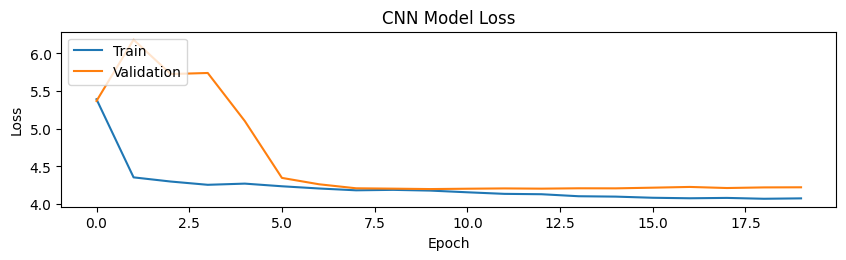


Evaluating Model: CLDNN
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Logits shape: (929, 6, 64)

Sample Predictions:
Prediction 1: a
Prediction 2: 5
Prediction 3: V
Prediction 4: n
Prediction 5: 1

Sample True vs. Predicted Comparisons:
True: 3 | Predicted: a
True: 3 | Predicted: 5
True: x | Predicted: V
True: u | Predicted: n
True: q | Predicted: 1

Sequence Accuracy for CLDNN: 23.04%


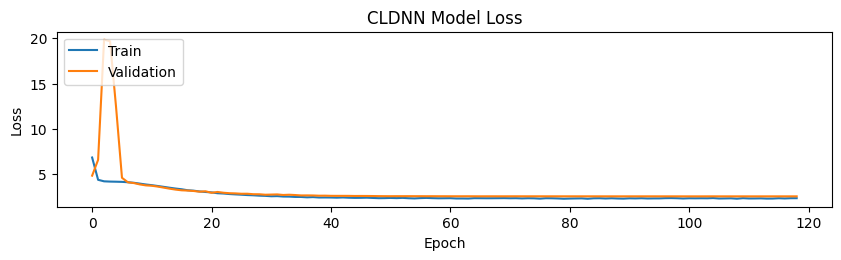


Evaluating Model: BiLSTM
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Logits shape: (929, 48, 64)

Sample Predictions:
Prediction 1: F
Prediction 2: F
Prediction 3: F
Prediction 4: F
Prediction 5: F

Sample True vs. Predicted Comparisons:
True: 3 | Predicted: F
True: 3 | Predicted: F
True: x | Predicted: F
True: u | Predicted: F
True: q | Predicted: F

Sequence Accuracy for BiLSTM: 0.86%


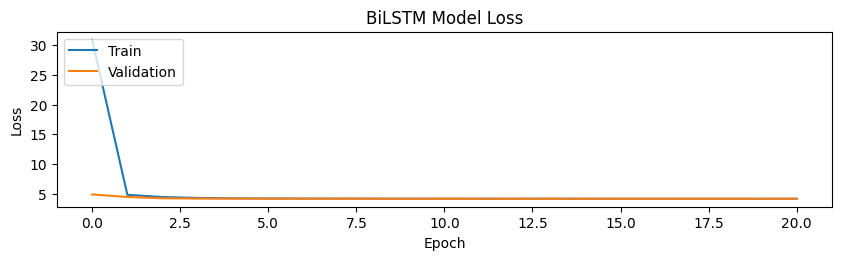


Evaluating Model: TCN
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Logits shape: (929, 48, 64)

Sample Predictions:
Prediction 1: S
Prediction 2: S
Prediction 3: q
Prediction 4: g
Prediction 5: q

Sample True vs. Predicted Comparisons:
True: 3 | Predicted: S
True: 3 | Predicted: S
True: x | Predicted: q
True: u | Predicted: g
True: q | Predicted: q

Sequence Accuracy for TCN: 3.88%


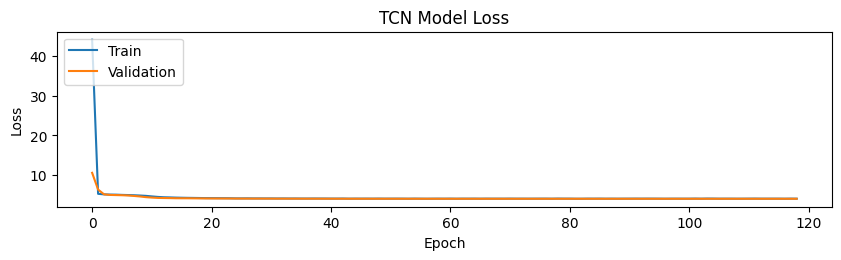


Evaluating Model: Transformer
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step
Logits shape: (929, 48, 64)

Sample Predictions:
Prediction 1: 
Prediction 2: 
Prediction 3: 
Prediction 4: 
Prediction 5: 

Sample True vs. Predicted Comparisons:
True: 3 | Predicted: 
True: 3 | Predicted: 
True: x | Predicted: 
True: u | Predicted: 
True: q | Predicted: 

Sequence Accuracy for Transformer: 0.00%


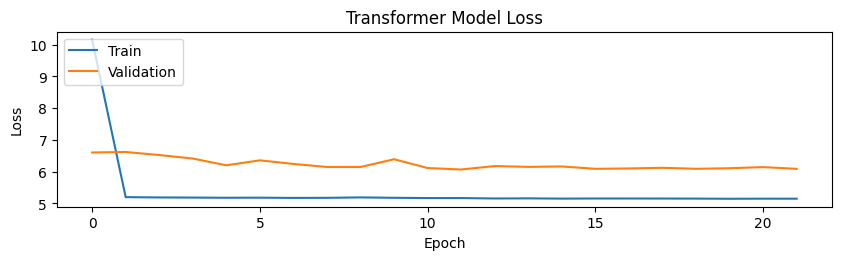


Evaluating Model: InceptionTime
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step
Logits shape: (929, 48, 64)

Sample Predictions:
Prediction 1: S
Prediction 2: K
Prediction 3: K
Prediction 4: -
Prediction 5: o

Sample True vs. Predicted Comparisons:
True: 3 | Predicted: S
True: 3 | Predicted: K
True: x | Predicted: K
True: u | Predicted: -
True: q | Predicted: o

Sequence Accuracy for InceptionTime: 4.74%


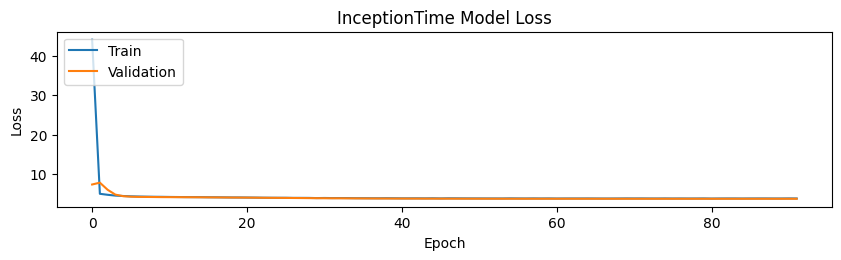


Evaluating Model: HMM-RNN
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Logits shape: (929, 48, 64)

Sample Predictions:
Prediction 1: F
Prediction 2: F
Prediction 3: F
Prediction 4: F
Prediction 5: F

Sample True vs. Predicted Comparisons:
True: 3 | Predicted: F
True: 3 | Predicted: F
True: x | Predicted: F
True: u | Predicted: F
True: q | Predicted: F

Sequence Accuracy for HMM-RNN: 0.86%


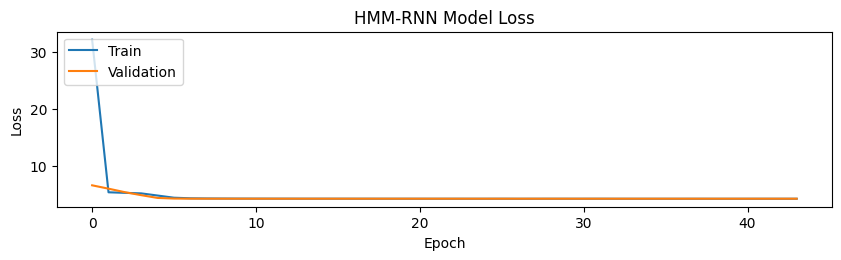


Evaluating Model: BLSTM-CTC
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Logits shape: (929, 48, 64)

Sample Predictions:
Prediction 1: F
Prediction 2: F
Prediction 3: F
Prediction 4: F
Prediction 5: F

Sample True vs. Predicted Comparisons:
True: 3 | Predicted: F
True: 3 | Predicted: F
True: x | Predicted: F
True: u | Predicted: F
True: q | Predicted: F

Sequence Accuracy for BLSTM-CTC: 0.86%


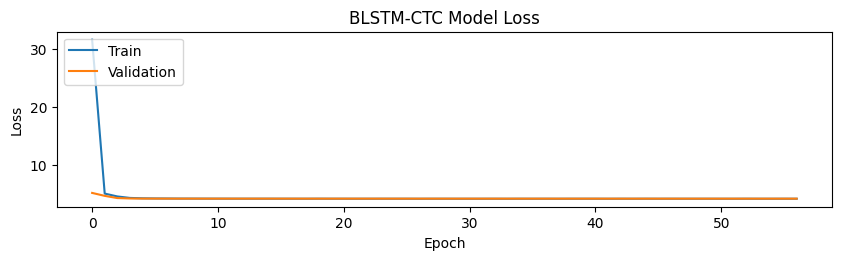


Evaluating Model: CNN-BiLSTM-Attention
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Logits shape: (929, 12, 64)

Sample Predictions:
Prediction 1: d
Prediction 2: d
Prediction 3: x
Prediction 4: Y
Prediction 5: q

Sample True vs. Predicted Comparisons:
True: 3 | Predicted: d
True: 3 | Predicted: d
True: x | Predicted: x
True: u | Predicted: Y
True: q | Predicted: q

Sequence Accuracy for CNN-BiLSTM-Attention: 7.64%


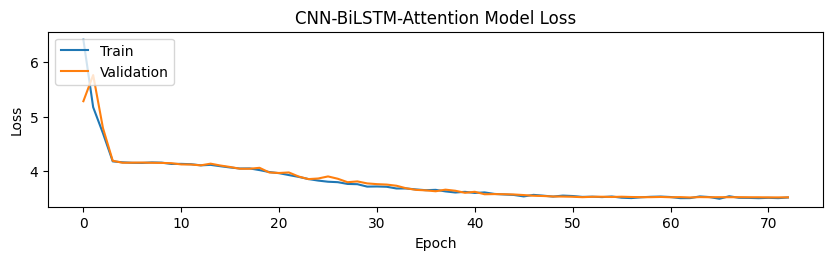


Evaluating Model: TCN-BiLSTM-Attention Hybrid
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Logits shape: (929, 48, 64)

Sample Predictions:
Prediction 1: 
Prediction 2: 
Prediction 3: 
Prediction 4: 
Prediction 5: 

Sample True vs. Predicted Comparisons:
True: 3 | Predicted: 
True: 3 | Predicted: 
True: x | Predicted: 
True: u | Predicted: 
True: q | Predicted: 

Sequence Accuracy for TCN-BiLSTM-Attention Hybrid: 21.53%


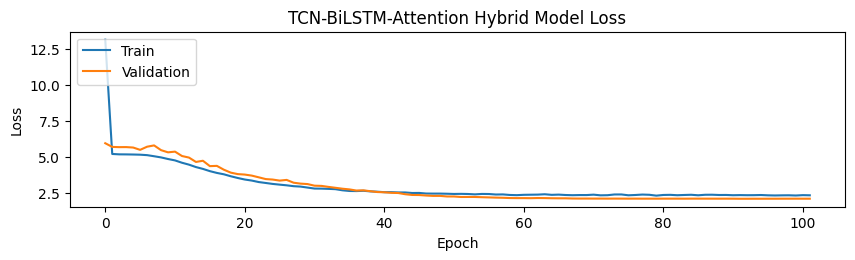


Evaluating Model: Attention-Based Seq2Seq Model
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Logits shape: (929, 12, 64)

Sample Predictions:
Prediction 1: B
Prediction 2: w
Prediction 3: r
Prediction 4: g
Prediction 5: s

Sample True vs. Predicted Comparisons:
True: 3 | Predicted: B
True: 3 | Predicted: w
True: x | Predicted: r
True: u | Predicted: g
True: q | Predicted: s

Sequence Accuracy for Attention-Based Seq2Seq Model: 5.81%


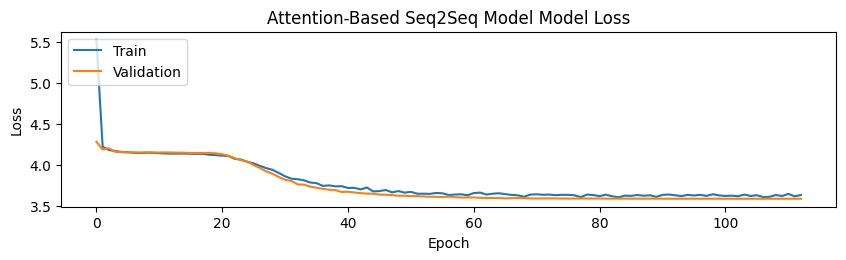


Evaluating Model: TCN-BiLSTM-Transformer Hybrid
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Logits shape: (929, 48, 64)

Sample Predictions:
Prediction 1: 
Prediction 2: 
Prediction 3: 
Prediction 4: 
Prediction 5: 

Sample True vs. Predicted Comparisons:
True: 3 | Predicted: 
True: 3 | Predicted: 
True: x | Predicted: 
True: u | Predicted: 
True: q | Predicted: 

Sequence Accuracy for TCN-BiLSTM-Transformer Hybrid: 0.00%


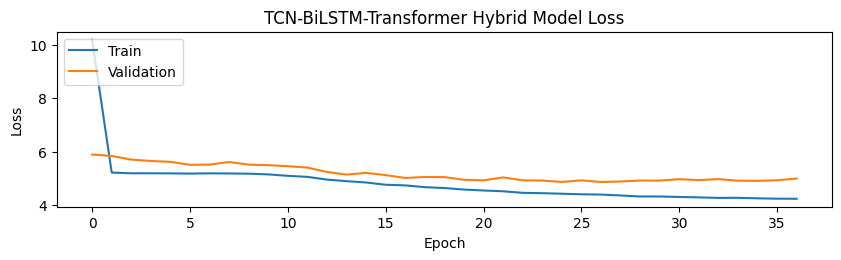


Summary of Model Performances:
CNN: Sequence Accuracy = 1.29%
CLDNN: Sequence Accuracy = 23.04%
BiLSTM: Sequence Accuracy = 0.86%
TCN: Sequence Accuracy = 3.88%
Transformer: Sequence Accuracy = 0.00%
InceptionTime: Sequence Accuracy = 4.74%
HMM-RNN: Sequence Accuracy = 0.86%
BLSTM-CTC: Sequence Accuracy = 0.86%
CNN-BiLSTM-Attention: Sequence Accuracy = 7.64%
TCN-BiLSTM-Attention Hybrid: Sequence Accuracy = 21.53%
Attention-Based Seq2Seq Model: Sequence Accuracy = 5.81%
TCN-BiLSTM-Transformer Hybrid: Sequence Accuracy = 0.00%


In [29]:
import tensorflow as tf
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Dictionary of pre-trained models and their histories
pretrained_models = {
    "CNN": (ctc_cnn_model, cnn_history),
    "CLDNN": (cldnn_model, cldnn_history),
    "BiLSTM": (bilstm_model, bilstm_history),
    "TCN": (tcn_model, tcn_history),
    "Transformer": (transformer_model, transformer_history),
    "InceptionTime": (inceptiontime_model, inceptiontime_history),
    "HMM-RNN": (hmm_rnn_model, hmm_rnn_history),
    "BLSTM-CTC": (blstm_ctc_model, blstm_ctc_history),
    "CNN-BiLSTM-Attention": (hybrid_model, hybrid_history),
    "TCN-BiLSTM-Attention Hybrid": (tcn_bilstm_attention_model, tcn_bilstm_attention_history),
    "Attention-Based Seq2Seq Model": (attention_seq2seq_model, attention_seq2seq_history),
    "TCN-BiLSTM-Transformer Hybrid": (tcn_bilstm_transformer_model, tcn_bilstm_transformer_history)
}

# Placeholder for results
results = {}

# Iterate through each pre-trained model
for model_name, (model, history) in pretrained_models.items():
    print(f"\nEvaluating Model: {model_name}\n" + "=" * 50)

    # Generate raw predictions (logits) from the pre-trained model
    logits = model.predict(X_test)
    print(f"Logits shape: {logits.shape}")  # Expected shape: (batch_size, time_steps, num_classes)

    # Use CTC greedy decoder to convert logits to sequences
    decoded_predictions, _ = tf.nn.ctc_greedy_decoder(
        tf.transpose(logits, [1, 0, 2]),  # Transpose for time-major format
        tf.fill([tf.shape(logits)[0]], tf.shape(logits)[1])  # Input length
    )

    # Convert the sparse tensor to dense format
    dense_predictions = tf.sparse.to_dense(decoded_predictions[0], default_value=0)

    # Convert from numeric indices to characters using `num_to_char` mapping
    predicted_texts = [
        ''.join(num_to_char(index).numpy().decode('utf-8') for index in prediction if index > 0)
        for prediction in dense_predictions
    ]

    # Display a few predictions
    print("\nSample Predictions:")
    for i, pred in enumerate(predicted_texts[:5]):
        print(f"Prediction {i+1}: {pred}")

    # Convert y_test (true labels) back to readable text
    true_texts = [
        ''.join(num_to_char(index).numpy().decode('utf-8') for index in label if index > 0)
        for label in y_test
    ]

    # Display a few comparisons
    print("\nSample True vs. Predicted Comparisons:")
    for i in range(5):
        print(f"True: {true_texts[i]} | Predicted: {predicted_texts[i]}")

    # Calculate sequence accuracy
    sequence_accuracy = sum([1 for true, pred in zip(true_texts, predicted_texts) if true == pred]) / len(true_texts)
    print(f"\nSequence Accuracy for {model_name}: {sequence_accuracy * 100:.2f}%")

    # Store results
    results[model_name] = sequence_accuracy

    # Plot model loss
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 1, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Summary of all model performances
print("\nSummary of Model Performances:\n" + "=" * 50)
for model_name, accuracy in results.items():
    print(f"{model_name}: Sequence Accuracy = {accuracy * 100:.2f}%")

In [30]:
# Sort models (highest sequence accuracy first)
sorted_models = sorted(results.items(), key=lambda x: x[1], reverse=True)

# Print
for model_name, accuracy in sorted_models:
    print(f"{model_name}: Sequence Accuracy = {accuracy * 100:.2f}%")

CLDNN: Sequence Accuracy = 23.04%
TCN-BiLSTM-Attention Hybrid: Sequence Accuracy = 21.53%
CNN-BiLSTM-Attention: Sequence Accuracy = 7.64%
Attention-Based Seq2Seq Model: Sequence Accuracy = 5.81%
InceptionTime: Sequence Accuracy = 4.74%
TCN: Sequence Accuracy = 3.88%
CNN: Sequence Accuracy = 1.29%
BiLSTM: Sequence Accuracy = 0.86%
HMM-RNN: Sequence Accuracy = 0.86%
BLSTM-CTC: Sequence Accuracy = 0.86%
Transformer: Sequence Accuracy = 0.00%
TCN-BiLSTM-Transformer Hybrid: Sequence Accuracy = 0.00%


In [34]:
# prompt: Save the top-three models to colab and pc desktop

import os

# Assuming 'pretrained_models' dictionary is defined as in your original code

# Specify the directory to save models in Colab
colab_save_dir = "/content/saved_models"
os.makedirs(colab_save_dir, exist_ok=True)

# Specify the directory to save models on your PC desktop
desktop_save_dir = os.path.expanduser("~/Desktop/saved_models")  # Use os.path.expanduser to handle different OS
os.makedirs(desktop_save_dir, exist_ok=True)


# Sort models (highest sequence accuracy first)
sorted_models = sorted(results.items(), key=lambda x: x[1], reverse=True)

# Save the top-three models
top_three_models = sorted_models[:3]

for model_name, accuracy in top_three_models:
    print(f"Saving model: {model_name} with accuracy {accuracy}")
    model = pretrained_models[model_name][0]

    # Save to Colab
    colab_model_path = os.path.join(colab_save_dir, f"{model_name}.h5")
    model.save(colab_model_path)
    print(f"Model saved to Colab at: {colab_model_path}")

Saving model: CLDNN with accuracy 0.2303552206673843
Model saved to Colab at: /content/saved_models/CLDNN.h5
Saving model: TCN-BiLSTM-Attention Hybrid with accuracy 0.21528525296017223
Model saved to Colab at: /content/saved_models/TCN-BiLSTM-Attention Hybrid.h5
Saving model: CNN-BiLSTM-Attention with accuracy 0.07642626480086114
Model saved to Colab at: /content/saved_models/CNN-BiLSTM-Attention.h5
